<a href="https://colab.research.google.com/github/Pritamart/project/blob/main/Copy_of_modelfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import statsmodels.api as sm
import warnings
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
import pickle

In [ ]:
df = pd.read_csv('/content/finaldata3.csv')

In [ ]:
df

,Unnamed: 0,colour2,colour1,sub_category,category_id,type,user_id,brand,buyer,month,price_id,price,date
0,0,0,0,3,11,8,2783,0,0,11,1343,561.51,2018-12-01
1,2,0,2,5,12,23,2784,1,0,11,422,54.66,2018-12-02
2,3,0,0,5,12,8,2313,0,0,11,1342,88.90,2018-12-02
3,4,0,0,4,13,2,3027,0,0,11,1049,417.67,2018-12-02
4,5,0,0,3,11,8,2326,1,0,11,1666,102.27,2018-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80609,95901,0,0,6,10,8,3824,0,0,11,16573,145.62,2021-12-01
80610,95904,0,0,3,11,2,4056,0,0,11,16671,301.23,2021-12-01
80611,95908,0,2,3,11,8,4129,1,0,11,16715,630.00,2021-12-01
80612,95909,0,2,3,11,11,2322,0,0,11,16716,83.42,2021-12-01


In [ ]:
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(df['price']))
print(z)

0        0.475020
1        0.676878
2        0.599062
3        0.148120
4        0.568676
           ...   
80609    0.470157
80610    0.116508
80611    0.630674
80612    0.611516
80613    0.580380
Name: price, Length: 80614, dtype: float64


In [ ]:
threshold = 3
df1 = df[z < 3]
df1.head()

,Unnamed: 0,colour2,colour1,sub_category,category_id,type,user_id,brand,buyer,month,price_id,price,date
0,0,0,0,3,11,8,2783,0,0,11,1343,561.51,2018-12-01
1,2,0,2,5,12,23,2784,1,0,11,422,54.66,2018-12-02
2,3,0,0,5,12,8,2313,0,0,11,1342,88.90,2018-12-02
3,4,0,0,4,13,2,3027,0,0,11,1049,417.67,2018-12-02
4,5,0,0,3,11,8,2326,1,0,11,1666,102.27,2018-12-02


In [ ]:
df1.shape


(79624, 13)

In [ ]:
df1 = df1.drop(df.columns[[0]], axis=1)
df1

,colour2,colour1,sub_category,category_id,type,user_id,brand,buyer,month,price_id,price,date
0,0,0,3,11,8,2783,0,0,11,1343,561.51,2018-12-01
1,0,2,5,12,23,2784,1,0,11,422,54.66,2018-12-02
2,0,0,5,12,8,2313,0,0,11,1342,88.90,2018-12-02
3,0,0,4,13,2,3027,0,0,11,1049,417.67,2018-12-02
4,0,0,3,11,8,2326,1,0,11,1666,102.27,2018-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...
80609,0,0,6,10,8,3824,0,0,11,16573,145.62,2021-12-01
80610,0,0,3,11,2,4056,0,0,11,16671,301.23,2021-12-01
80611,0,2,3,11,8,4129,1,0,11,16715,630.00,2021-12-01
80612,0,2,3,11,11,2322,0,0,11,16716,83.42,2021-12-01


In [ ]:
date1=df1['date']
x2=df1.drop(['price','date'], axis=1)

In [ ]:
X = df1.drop(['price'], axis=1)
y = df1['price']

In [ ]:
import pandas as pd

X1=pd.get_dummies(x2, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
X1

,colour2,colour1,sub_category,category_id,type,user_id,brand,buyer,month,price_id
0,0,0,3,11,8,2783,0,0,11,1343
1,0,2,5,12,23,2784,1,0,11,422
2,0,0,5,12,8,2313,0,0,11,1342
3,0,0,4,13,2,3027,0,0,11,1049
4,0,0,3,11,8,2326,1,0,11,1666
...,...,...,...,...,...,...,...,...,...,...
80609,0,0,6,10,8,3824,0,0,11,16573
80610,0,0,3,11,2,4056,0,0,11,16671
80611,0,2,3,11,8,4129,1,0,11,16715
80612,0,2,3,11,11,2322,0,0,11,16716


Variance score: 0.09894669616929519
RMSE_train :   0.9808724634092411
RMSE_test :   1.982170074313991


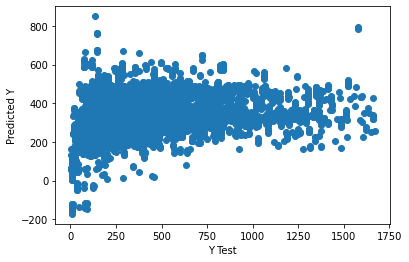

In [ ]:
# LinearRegression

X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.2,random_state=82)
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.coef_													
print('Variance score: {}'.format(lm.score(X_test, y_test)))
predictions = lm.predict(X_test)

plt.scatter(np.array(y_test),predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

predictions_train = lm.predict(X_train)
print('RMSE_train :'," ", np.sqrt(metrics.mean_squared_error(y_train,predictions_train)/len(np.array(y_train))))
print('RMSE_test :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)/len(np.array(y_test))))

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,predictions))

0.09894669616929519


In [ ]:
filename = 'LinearRegression_model.pkl'
pickle.dump(lm,open(filename,'wb'))

In [ ]:
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(X_test)

array([406.47537682, 272.31637343, 465.1142699 , ..., 245.60848125,
       312.58961172, 301.62365344])

In [ ]:
from sklearn.model_selection import train_test_split
X = df1.drop(['price'], axis=1)
y = df1['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.01)
test_date=X_test['date']
X_train1=X_train.drop(['date'], axis=1)
X_test1=X_test.drop(['date'], axis=1)
X_train1.shape
y_test.shape

(797,)

In [ ]:
filename = '/content/LinearRegression_model.pkl'
pickle.dump(lm,open(filename,'wb'))


In [ ]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [ ]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train1, y_train)
predict=reg.predict(X_test1)
mse_t = mean_squared_error(y_train, reg.predict(X_train1))

mse = mean_squared_error(y_test, reg.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 49973.6341


RMSE_train :   0.7750724319692092
RMSE_test :   7.9184705445424965


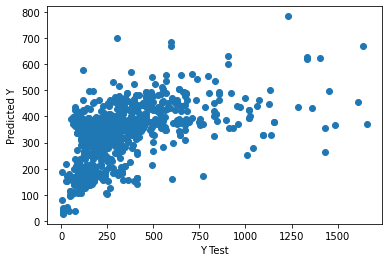

In [ ]:
plt.scatter(np.array(y_test), reg.predict(X_test1))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
predictions_train = reg.predict(X_train1)
predictions_train
print('RMSE_train :'," ",np.sqrt(mse_t/len(np.array(y_train))))
print('RMSE_test :'," ",np.sqrt(mse/len(np.array(y_test))))

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,predict))

0.28275650242522554


[ 187.8242      192.1195      268.63        465.62        103.97
  542.5662      124.1271       86.16        163.6158      204.42
  233.5788      184.79        130.          403.821       150.55
  232.74        145.9535      185.1483      210.9842      213.7
  135.1811      135.8882      551.3946      307.9107      213.8884
  285.4086      356.03        244.1377     1157.4          68.36
  139.6625      268.63        433.9146      464.11        520.48995
  152.10236     101.2785       88.9         387.1229      152.057
  636.85        534.11        549.1812       84.79        305.6851
  221.8029      701.2364      199.0615      314.7245      809.9144
  155.6195      422.8743        6.71         78.2923      345.4292
  141.4395      347.81         73.84        273.5835      115.5626
  335.48       1020.41        259.3589      143.7         118.5444
  843.7907      161.7139      373.6209      106.4224      157.4
  129.9454      215.14         33.6299      275.546        40.9622
  146.940

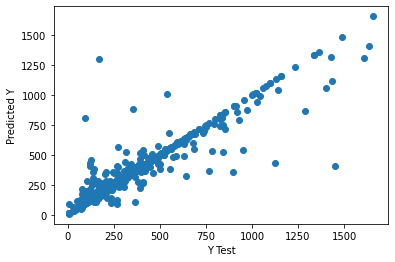

In [ ]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
model.fit(X_train1,y_train)
predict=model.predict(X_test1)
print(predict)
print(model)

predictions = model.predict(X_test1)
plt.scatter(np.array(y_test),predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
predictions_train = model.predict(X_train1)
print('RMSE_train :'," ", np.sqrt(metrics.mean_squared_error(y_train,predictions_train)/len(np.array(y_train))))
print('RMSE_test :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)/len(np.array(y_test))))

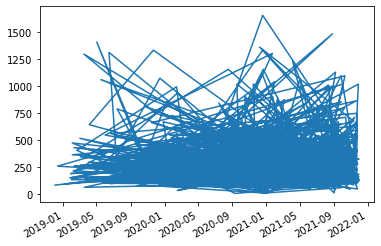

In [ ]:
date_time = pd.to_datetime(test_date)
DF = pd.DataFrame()
DF['value1'] = predictions
DF['value2'] = y_test
DF = DF.set_index(date_time)
plt.plot(DF)
plt.gcf().autofmt_xdate()
plt.show()

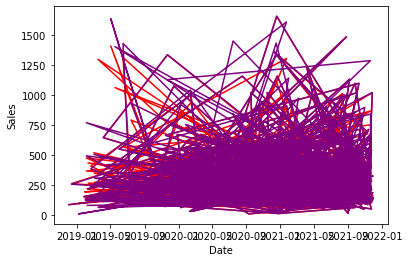

In [ ]:
date_time = pd.to_datetime(test_date)
plt.plot(date_time,predictions,color='red',label='predicted')
plt.plot(date_time,y_test,color='purple',label="actual")
plt.xlabel("Date")
plt.ylabel("Sales")
# leg = plt.legend()
plt.show()

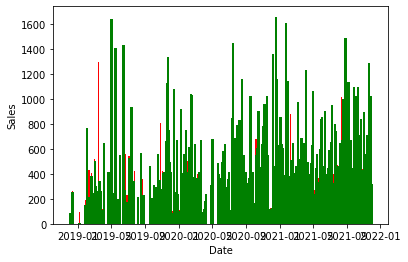

In [ ]:
date_time = pd.to_datetime(test_date)
plt.bar(date_time,predictions,color='blue',label='predicted',width=5)
plt.bar(date_time,y_test,color='red',label="actual",width=8)
plt.xlabel("Date")
plt.ylabel("Sales")
leg = ax.legend(loc ="lower left");
plt.show()

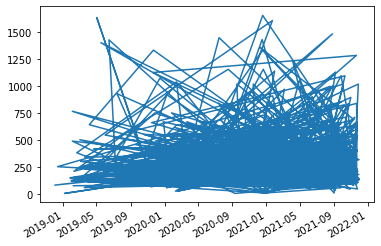

In [ ]:
date_time = pd.to_datetime(test_date)
DF = pd.DataFrame()
DF['value'] = y_test
DF = DF.set_index(date_time)
plt.plot(DF)
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
filename = '/content/Random Forest_model.pkl'
pickle.dump(regressor,open(filename,'wb'))
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(X_test)

NameError: ignored

In [ ]:
filename = '/content/model.pkl'
pickle.dump(lm,open(filename,'wb'))
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(X_test1)

array([ 292.44357145,  342.49199742,  313.15386733,  287.50663323,
        246.41897548,  343.24769896,  307.27532925,  297.28113212,
        324.96374624,  458.21137156,  317.64689853,  253.21767902,
        325.10933591,  317.35983672,  374.0389153 ,  410.56135748,
        237.25412143,  292.63685058,  288.44878473,  301.24401815,
        319.85649463,  367.84734301,  316.76675889,  307.07214292,
        298.40101869,  258.6898503 ,  475.54745114,  228.65836882,
        316.69823546,  207.85773459,  224.11095837,  307.34245245,
        282.44358391,  330.27253692,  392.84737979,  269.84158419,
        317.87664413,  188.43824885,  340.88847355,  224.58624679,
        447.70753994,  326.21344524,  267.65545894,  343.87370784,
        276.17401173,  361.88531353,  500.03550065,  245.24451729,
        297.40372854,  463.89109281,  671.37491279,  463.53934682,
       -133.0131263 ,  266.80042397,  223.21034873,  301.75270307,
        288.85676872,  369.87054819,  310.23821231,  348.44067

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,predictions))

0.876846684543035


In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tqdm import tqdm
pred_y_test_rolling =[]

In [ ]:
for i in tqdm(range(len(X_test1))):
    X_train1 = X_train1.append(X_test1[-1+i:i])
    y_train = y_train.append(y_test[-1+i:i])
    #model = RandomForestRegressor(n_estimators = 100, random_state = 0)
    model1 = model.fit(X_train1,y_train)
    a=float(model1.predict(X_test1[0+i:1+i]))
    print(a)
    pred_y_test_rolling.append(a)


  0%|          | 1/797 [01:02<13:54:36, 62.91s/it]

520.4100000000012


  0%|          | 2/797 [01:28<8:59:11, 40.69s/it] 

263.86099999999976


  0%|          | 3/797 [01:58<7:55:18, 35.92s/it]

33.67840000000004


  1%|          | 4/797 [02:43<8:41:15, 39.44s/it]

44.858628571428554


  1%|          | 5/797 [03:12<7:54:40, 35.96s/it]

280.68000000000023


  1%|          | 6/797 [03:41<7:22:44, 33.58s/it]

91.64000000000007


  1%|          | 7/797 [04:10<7:02:49, 32.11s/it]

215.13999999999945


  1%|          | 8/797 [04:40<6:49:25, 31.14s/it]

116.29999999999987


  1%|          | 9/797 [05:06<6:30:21, 29.72s/it]

232.80850000000035


  1%|▏         | 10/797 [05:32<6:16:02, 28.67s/it]

657.400000000001


  1%|▏         | 11/797 [05:57<6:00:21, 27.51s/it]

677.9499999999988


  2%|▏         | 12/797 [06:22<5:47:46, 26.58s/it]

465.6200000000006


  2%|▏         | 13/797 [06:46<5:36:58, 25.79s/it]

328.6300000000003


  2%|▏         | 14/797 [07:10<5:32:04, 25.45s/it]

246.43999999999969


  2%|▏         | 15/797 [07:35<5:27:24, 25.12s/it]

238.7131000000002


  2%|▏         | 16/797 [07:59<5:23:31, 24.85s/it]

249.18839999999977


  2%|▏         | 17/797 [08:23<5:21:10, 24.71s/it]

142.32999999999996


  2%|▏         | 18/797 [08:48<5:19:02, 24.57s/it]

438.9055999999998


  2%|▏         | 19/797 [09:12<5:17:13, 24.46s/it]

172.92919999999987


  3%|▎         | 20/797 [09:36<5:15:34, 24.37s/it]

159.77550000000016


  3%|▎         | 21/797 [10:00<5:14:52, 24.35s/it]

287.52999999999963


  3%|▎         | 22/797 [10:24<5:13:30, 24.27s/it]

151.92000000000004


  3%|▎         | 23/797 [10:48<5:10:58, 24.11s/it]

416.00309999999996


  3%|▎         | 24/797 [11:12<5:09:36, 24.03s/it]

273.8400000000001


  3%|▎         | 25/797 [11:36<5:10:02, 24.10s/it]

413.1910000000005


  3%|▎         | 26/797 [12:00<5:09:57, 24.12s/it]

134.11000000000016


  3%|▎         | 27/797 [12:25<5:10:06, 24.16s/it]

208.5322000000004


  4%|▎         | 28/797 [12:49<5:09:25, 24.14s/it]

305.1761999999997


  4%|▎         | 29/797 [13:13<5:09:31, 24.18s/it]

336.13199999999966


  4%|▍         | 30/797 [13:37<5:08:46, 24.15s/it]

227.72630000000052


  4%|▍         | 31/797 [14:01<5:08:30, 24.17s/it]

243.16040000000015


  4%|▍         | 32/797 [14:26<5:08:26, 24.19s/it]

212.33000000000007


  4%|▍         | 33/797 [14:50<5:08:10, 24.20s/it]

554.1068999999993


  4%|▍         | 34/797 [15:14<5:06:47, 24.13s/it]

82.46100000000011


  4%|▍         | 35/797 [15:38<5:05:17, 24.04s/it]

137.92949999999982


  5%|▍         | 36/797 [16:02<5:05:28, 24.08s/it]

417.532999999999


  5%|▍         | 37/797 [16:26<5:05:40, 24.13s/it]

6.710000000000001


  5%|▍         | 38/797 [16:50<5:05:52, 24.18s/it]

227.12279999999973


  5%|▍         | 39/797 [17:15<5:05:44, 24.20s/it]

1047.8099999999986


  5%|▌         | 40/797 [17:39<5:05:58, 24.25s/it]

138.21999999999977


  5%|▌         | 41/797 [18:03<5:05:22, 24.24s/it]

415.8037000000004


  5%|▌         | 42/797 [18:27<5:05:03, 24.24s/it]

999.8600000000005


  5%|▌         | 43/797 [18:52<5:04:37, 24.24s/it]

201.4789999999998


  6%|▌         | 44/797 [19:16<5:04:09, 24.24s/it]

949.6999999999985


  6%|▌         | 45/797 [19:40<5:03:28, 24.21s/it]

308.0800000000008


  6%|▌         | 46/797 [20:04<5:01:45, 24.11s/it]

636.4423999999992


  6%|▌         | 47/797 [20:28<5:00:15, 24.02s/it]

471.31999999999977


  6%|▌         | 48/797 [20:52<5:00:28, 24.07s/it]

501.32850000000036


  6%|▌         | 49/797 [21:16<5:00:53, 24.14s/it]

434.82479999999936


  6%|▋         | 50/797 [21:40<5:00:32, 24.14s/it]

246.7524999999997


  6%|▋         | 51/797 [22:05<5:00:33, 24.17s/it]

482.02070000000094


  7%|▋         | 52/797 [22:29<5:00:05, 24.17s/it]

387.1548000000003


  7%|▋         | 53/797 [22:53<4:59:54, 24.19s/it]

253.29000000000062


  7%|▋         | 54/797 [23:17<4:59:21, 24.17s/it]

639.606900000001


  7%|▋         | 55/797 [23:41<4:58:49, 24.16s/it]

540.9599999999992


  7%|▋         | 56/797 [24:05<4:58:05, 24.14s/it]

177.95000000000036


  7%|▋         | 57/797 [24:29<4:56:44, 24.06s/it]

225.8899999999996


  7%|▋         | 58/797 [24:53<4:54:17, 23.89s/it]

598.7404500000009


  7%|▋         | 59/797 [25:17<4:55:05, 23.99s/it]

121.50860000000016


  8%|▊         | 60/797 [25:41<4:55:25, 24.05s/it]

1414.1099999999994


  8%|▊         | 61/797 [26:05<4:55:20, 24.08s/it]

397.12000000000023


  8%|▊         | 62/797 [26:29<4:55:33, 24.13s/it]

137.00559999999973


  8%|▊         | 63/797 [26:54<4:54:56, 24.11s/it]

321.50600000000037


  8%|▊         | 64/797 [27:18<4:54:17, 24.09s/it]

239.59000000000012


  8%|▊         | 65/797 [27:42<4:53:41, 24.07s/it]

630.0


  8%|▊         | 66/797 [28:06<4:53:23, 24.08s/it]

328.6300000000002


  8%|▊         | 67/797 [28:30<4:53:13, 24.10s/it]

153.02300000000017


  9%|▊         | 68/797 [28:54<4:51:58, 24.03s/it]

73.25299999999989


  9%|▊         | 69/797 [29:17<4:50:01, 23.90s/it]

566.9899999999996


  9%|▉         | 70/797 [29:41<4:50:24, 23.97s/it]

233.35640000000035


  9%|▉         | 71/797 [30:06<4:51:22, 24.08s/it]

191.63999999999976


  9%|▉         | 72/797 [30:30<4:51:35, 24.13s/it]

276.5725999999997


  9%|▉         | 73/797 [30:54<4:51:45, 24.18s/it]

205.34000000000012


  9%|▉         | 74/797 [31:19<4:52:01, 24.23s/it]

98.24849999999982


  9%|▉         | 75/797 [31:43<4:51:19, 24.21s/it]

116.16180000000018


 10%|▉         | 76/797 [32:07<4:50:47, 24.20s/it]

486.1600000000011


 10%|▉         | 77/797 [32:31<4:50:15, 24.19s/it]

71.31200000000008


 10%|▉         | 78/797 [32:55<4:49:38, 24.17s/it]

164.25


 10%|▉         | 79/797 [33:19<4:49:14, 24.17s/it]

295.6130000000002


 10%|█         | 80/797 [33:43<4:46:39, 23.99s/it]

81.88570000000013


 10%|█         | 81/797 [34:07<4:46:04, 23.97s/it]

116.29999999999987


 10%|█         | 82/797 [34:31<4:46:34, 24.05s/it]

540.9599999999992


 10%|█         | 83/797 [34:55<4:46:28, 24.07s/it]

200.54429999999974


 11%|█         | 84/797 [35:20<4:46:43, 24.13s/it]

419.54800000000023


 11%|█         | 85/797 [35:44<4:46:25, 24.14s/it]

249.59179999999978


 11%|█         | 86/797 [36:08<4:46:04, 24.14s/it]

266.9900000000005


 11%|█         | 87/797 [36:32<4:45:55, 24.16s/it]

386.0172999999995


 11%|█         | 88/797 [36:56<4:45:36, 24.17s/it]

534.1100000000005


 11%|█         | 89/797 [37:21<4:45:30, 24.20s/it]

123.14999999999978


 11%|█▏        | 90/797 [37:45<4:45:14, 24.21s/it]

101.22999999999975


 11%|█▏        | 91/797 [38:09<4:44:12, 24.15s/it]

422.85269999999974


 12%|█▏        | 92/797 [38:32<4:42:09, 24.01s/it]

294.3800000000003


 12%|█▏        | 93/797 [38:57<4:42:36, 24.09s/it]

81.12230000000008


 12%|█▏        | 94/797 [39:21<4:43:35, 24.20s/it]

1097.2599999999982


 12%|█▏        | 95/797 [39:46<4:44:18, 24.30s/it]

249.3802999999999


 12%|█▏        | 96/797 [40:10<4:43:29, 24.26s/it]

509.4145000000006


 12%|█▏        | 97/797 [40:34<4:43:12, 24.28s/it]

73.84000000000012


 12%|█▏        | 98/797 [40:58<4:42:45, 24.27s/it]

387.8863999999992


 12%|█▏        | 99/797 [41:23<4:41:52, 24.23s/it]

680.3043000000002


 13%|█▎        | 100/797 [41:47<4:41:20, 24.22s/it]

34.455800000000025


 13%|█▎        | 101/797 [42:11<4:41:14, 24.24s/it]

330.1619999999996


 13%|█▎        | 102/797 [42:36<4:42:26, 24.38s/it]

183.06459999999987


 13%|█▎        | 103/797 [43:00<4:41:43, 24.36s/it]

68.16659999999996


 13%|█▎        | 104/797 [43:24<4:39:33, 24.20s/it]

59.08919999999993


 13%|█▎        | 105/797 [43:48<4:37:20, 24.05s/it]

139.97479999999965


 13%|█▎        | 106/797 [44:12<4:37:01, 24.05s/it]

255.6681999999999


 13%|█▎        | 107/797 [44:36<4:37:09, 24.10s/it]

428.62999999999965


 14%|█▎        | 108/797 [45:00<4:36:36, 24.09s/it]

145.45740000000035


 14%|█▎        | 109/797 [45:24<4:36:47, 24.14s/it]

705.3399999999982


 14%|█▍        | 110/797 [45:48<4:36:13, 24.13s/it]

277.9500000000005


 14%|█▍        | 111/797 [46:13<4:36:49, 24.21s/it]

369.7300000000001


 14%|█▍        | 112/797 [46:37<4:36:34, 24.23s/it]

602.4762000000011


 14%|█▍        | 113/797 [47:01<4:36:05, 24.22s/it]

478.6687000000001


 14%|█▍        | 114/797 [47:26<4:37:29, 24.38s/it]

446.3052000000004


 14%|█▍        | 115/797 [47:50<4:37:11, 24.39s/it]

157.39999999999975


 15%|█▍        | 116/797 [48:14<4:35:15, 24.25s/it]

516.3246999999998


 15%|█▍        | 117/797 [48:39<4:35:11, 24.28s/it]

309.2700000000004


 15%|█▍        | 118/797 [49:03<4:35:12, 24.32s/it]

766.9900000000001


 15%|█▍        | 119/797 [49:27<4:35:07, 24.35s/it]

917.6699999999984


 15%|█▌        | 120/797 [49:52<4:35:49, 24.45s/it]

446.9202000000004


 15%|█▌        | 121/797 [50:17<4:36:41, 24.56s/it]

732.74


 15%|█▌        | 122/797 [50:42<4:36:57, 24.62s/it]

194.72999999999993


 15%|█▌        | 123/797 [51:06<4:36:16, 24.59s/it]

307.5320000000008


 16%|█▌        | 124/797 [51:30<4:34:22, 24.46s/it]

280.68000000000023


 16%|█▌        | 125/797 [51:55<4:34:17, 24.49s/it]

214.44890000000032


 16%|█▌        | 126/797 [52:20<4:34:40, 24.56s/it]

436.8499999999992


 16%|█▌        | 127/797 [52:44<4:33:52, 24.53s/it]

609.124599999999


 16%|█▌        | 128/797 [53:08<4:32:34, 24.45s/it]

148.79639999999975


 16%|█▌        | 129/797 [53:33<4:33:58, 24.61s/it]

314.82400000000007


 16%|█▋        | 130/797 [53:58<4:34:18, 24.68s/it]

1381.3987000000022


 16%|█▋        | 131/797 [54:22<4:32:24, 24.54s/it]

766.9900000000001


 17%|█▋        | 132/797 [54:48<4:33:46, 24.70s/it]

165.62000000000032


 17%|█▋        | 133/797 [55:12<4:32:11, 24.60s/it]

403.9700000000006


 17%|█▋        | 134/797 [55:36<4:30:35, 24.49s/it]

295.48120000000023


 17%|█▋        | 135/797 [56:00<4:28:20, 24.32s/it]

81.15480000000007


 17%|█▋        | 136/797 [56:24<4:27:39, 24.30s/it]

160.93036666666686


 17%|█▋        | 137/797 [56:48<4:26:43, 24.25s/it]

256.8050000000006


 17%|█▋        | 138/797 [57:13<4:26:31, 24.27s/it]

540.9599999999992


 17%|█▋        | 139/797 [57:37<4:26:17, 24.28s/it]

245.22340000000034


 18%|█▊        | 140/797 [58:02<4:27:17, 24.41s/it]

1082.050000000002


 18%|█▊        | 141/797 [58:26<4:27:09, 24.44s/it]

313.1782000000003


 18%|█▊        | 142/797 [58:51<4:26:19, 24.40s/it]

648.1527000000012


 18%|█▊        | 143/797 [59:15<4:26:14, 24.43s/it]

142.4167999999998


 18%|█▊        | 144/797 [59:39<4:25:16, 24.37s/it]

266.9900000000005


 18%|█▊        | 145/797 [1:00:04<4:24:33, 24.35s/it]

575.2099999999992


 18%|█▊        | 146/797 [1:00:29<4:26:27, 24.56s/it]

637.7809


 18%|█▊        | 147/797 [1:00:53<4:25:48, 24.54s/it]

26.462100000000007


 19%|█▊        | 148/797 [1:01:18<4:25:34, 24.55s/it]

275.57689999999957


 19%|█▊        | 149/797 [1:01:41<4:22:35, 24.31s/it]

581.2373999999993


 19%|█▉        | 150/797 [1:02:05<4:21:06, 24.21s/it]

414.59010000000023


 19%|█▉        | 151/797 [1:02:30<4:22:55, 24.42s/it]

92.67789999999995


 19%|█▉        | 152/797 [1:02:55<4:23:13, 24.49s/it]

1119.6747


 19%|█▉        | 153/797 [1:03:20<4:23:49, 24.58s/it]

101.22999999999975


 19%|█▉        | 154/797 [1:03:45<4:23:49, 24.62s/it]

242.90000000000043


 19%|█▉        | 155/797 [1:04:09<4:22:49, 24.56s/it]

241.46419999999998


 20%|█▉        | 156/797 [1:04:34<4:22:31, 24.57s/it]

113.90269999999984


 20%|█▉        | 157/797 [1:04:58<4:21:01, 24.47s/it]

486.1600000000011


 20%|█▉        | 158/797 [1:05:22<4:19:41, 24.38s/it]

107.7070000000001


 20%|█▉        | 159/797 [1:05:46<4:18:58, 24.36s/it]

181.77899999999994


 20%|██        | 160/797 [1:06:11<4:18:23, 24.34s/it]

328.33969999999937


 20%|██        | 161/797 [1:06:35<4:18:30, 24.39s/it]

194.72999999999996


 20%|██        | 162/797 [1:07:00<4:18:24, 24.42s/it]

234.87939999999966


 20%|██        | 163/797 [1:07:24<4:17:53, 24.41s/it]

354.43469999999996


 21%|██        | 164/797 [1:07:48<4:15:04, 24.18s/it]

609.4499999999989


 21%|██        | 165/797 [1:08:12<4:14:04, 24.12s/it]

253.49550000000056


 21%|██        | 166/797 [1:08:36<4:14:38, 24.21s/it]

780.6799999999989


 21%|██        | 167/797 [1:09:00<4:14:02, 24.19s/it]

109.45000000000009


 21%|██        | 168/797 [1:09:25<4:14:42, 24.30s/it]

294.3800000000003


 21%|██        | 169/797 [1:09:49<4:14:05, 24.28s/it]

205.34000000000012


 21%|██▏       | 170/797 [1:10:13<4:13:22, 24.25s/it]

209.81000000000006


 21%|██▏       | 171/797 [1:10:37<4:12:42, 24.22s/it]

1212.601000000001


 22%|██▏       | 172/797 [1:11:01<4:12:06, 24.20s/it]

243.70000000000047


 22%|██▏       | 173/797 [1:11:26<4:13:48, 24.40s/it]

486.1600000000011


 22%|██▏       | 174/797 [1:11:51<4:15:31, 24.61s/it]

257.69520000000034


 22%|██▏       | 175/797 [1:12:16<4:15:46, 24.67s/it]

68.5516999999999


 22%|██▏       | 176/797 [1:12:41<4:15:09, 24.65s/it]

399.10649999999936


 22%|██▏       | 177/797 [1:13:05<4:14:56, 24.67s/it]

301.56220000000053


 22%|██▏       | 178/797 [1:13:30<4:12:55, 24.52s/it]

766.9900000000002


 22%|██▏       | 179/797 [1:13:53<4:10:04, 24.28s/it]

801.2300000000005


 23%|██▎       | 180/797 [1:14:17<4:08:15, 24.14s/it]

72.47000000000007


 23%|██▎       | 181/797 [1:14:41<4:07:52, 24.14s/it]

10.269999999999996


 23%|██▎       | 182/797 [1:15:06<4:09:09, 24.31s/it]

424.5199999999996


 23%|██▎       | 183/797 [1:15:30<4:08:07, 24.25s/it]

489.06759999999895


 23%|██▎       | 184/797 [1:15:54<4:07:43, 24.25s/it]

247.2368000000003


 23%|██▎       | 185/797 [1:16:19<4:08:10, 24.33s/it]

225.88999999999967


 23%|██▎       | 186/797 [1:16:44<4:09:21, 24.49s/it]

292.5722000000002


 23%|██▎       | 187/797 [1:17:08<4:07:42, 24.36s/it]

83.42000000000006


 24%|██▎       | 188/797 [1:17:32<4:06:23, 24.28s/it]

309.2700000000004


 24%|██▎       | 189/797 [1:17:56<4:06:53, 24.36s/it]

89.9514133333333


 24%|██▍       | 190/797 [1:18:21<4:07:40, 24.48s/it]

200.45000000000036


 24%|██▍       | 191/797 [1:18:46<4:08:05, 24.56s/it]

109.45000000000009


 24%|██▍       | 192/797 [1:19:11<4:08:09, 24.61s/it]

347.80999999999983


 24%|██▍       | 193/797 [1:19:35<4:07:31, 24.59s/it]

51.92000000000005


 24%|██▍       | 194/797 [1:19:59<4:05:24, 24.42s/it]

71.45610000000012


 24%|██▍       | 195/797 [1:20:23<4:03:31, 24.27s/it]

298.5588999999997


 25%|██▍       | 196/797 [1:20:47<4:02:57, 24.26s/it]

368.35180000000014


 25%|██▍       | 197/797 [1:21:12<4:02:22, 24.24s/it]

294.72250000000025


 25%|██▍       | 198/797 [1:21:36<4:01:32, 24.19s/it]

321.77999999999935


 25%|██▍       | 199/797 [1:22:00<4:01:14, 24.21s/it]

295.54529999999966


 25%|██▌       | 200/797 [1:22:25<4:03:01, 24.42s/it]

229.37559999999988


 25%|██▌       | 201/797 [1:22:49<4:02:48, 24.44s/it]

390.26999999999975


 25%|██▌       | 202/797 [1:23:14<4:03:25, 24.55s/it]

401.1103000000005


 25%|██▌       | 203/797 [1:23:38<4:01:40, 24.41s/it]

144.42069999999995


 26%|██▌       | 204/797 [1:24:03<4:01:46, 24.46s/it]

143.70000000000024


 26%|██▌       | 205/797 [1:24:27<4:01:45, 24.50s/it]

232.74000000000032


 26%|██▌       | 206/797 [1:24:52<4:01:24, 24.51s/it]

283.0851000000005


 26%|██▌       | 207/797 [1:25:16<4:00:57, 24.50s/it]

232.25620000000035


 26%|██▌       | 208/797 [1:25:41<3:59:25, 24.39s/it]

805.8918000000011


 26%|██▌       | 209/797 [1:26:04<3:57:37, 24.25s/it]

209.81000000000006


 26%|██▋       | 210/797 [1:26:29<3:57:13, 24.25s/it]

156.26599999999974


 26%|██▋       | 211/797 [1:26:53<3:57:10, 24.28s/it]

368.80740000000026


 27%|██▋       | 212/797 [1:27:17<3:56:49, 24.29s/it]

95.75


 27%|██▋       | 213/797 [1:27:42<3:56:42, 24.32s/it]

362.01120000000026


 27%|██▋       | 214/797 [1:28:06<3:56:58, 24.39s/it]

212.18999999999986


 27%|██▋       | 215/797 [1:28:31<3:56:01, 24.33s/it]

373.84000000000094


 27%|██▋       | 216/797 [1:28:55<3:55:40, 24.34s/it]

205.40860000000012


 27%|██▋       | 217/797 [1:29:19<3:55:03, 24.32s/it]

78.32519999999994


 27%|██▋       | 218/797 [1:29:44<3:55:25, 24.40s/it]

258.06299999999976


 27%|██▋       | 219/797 [1:30:08<3:55:59, 24.50s/it]

137.5055999999997


 28%|██▊       | 220/797 [1:30:33<3:55:09, 24.45s/it]

113.55999999999999


 28%|██▊       | 221/797 [1:30:57<3:54:28, 24.42s/it]

431.2711999999998


 28%|██▊       | 222/797 [1:31:22<3:53:48, 24.40s/it]

390.2719999999998


 28%|██▊       | 223/797 [1:31:46<3:54:38, 24.53s/it]

204.68519999999964


 28%|██▊       | 224/797 [1:32:11<3:54:57, 24.60s/it]

65.39939999999991


 28%|██▊       | 225/797 [1:32:36<3:54:36, 24.61s/it]

1195.75


 28%|██▊       | 226/797 [1:33:00<3:54:12, 24.61s/it]

1391.4531000000006


 28%|██▊       | 227/797 [1:33:25<3:53:18, 24.56s/it]

180.81999999999982


 29%|██▊       | 228/797 [1:33:49<3:52:18, 24.50s/it]

207.4499999999999


 29%|██▊       | 229/797 [1:34:15<3:54:48, 24.80s/it]

287.52999999999963


 29%|██▉       | 230/797 [1:34:39<3:53:30, 24.71s/it]

369.7300000000001


 29%|██▉       | 231/797 [1:35:04<3:52:33, 24.65s/it]

271.5673000000001


 29%|██▉       | 232/797 [1:35:28<3:51:49, 24.62s/it]

671.0999999999991


 29%|██▉       | 233/797 [1:35:53<3:50:56, 24.57s/it]

194.72999999999993


 29%|██▉       | 234/797 [1:36:17<3:49:39, 24.48s/it]

539.0419999999995


 29%|██▉       | 235/797 [1:36:41<3:48:26, 24.39s/it]

191.63999999999976


 30%|██▉       | 236/797 [1:37:05<3:47:48, 24.36s/it]

233.35640000000035


 30%|██▉       | 237/797 [1:37:30<3:47:59, 24.43s/it]

1504.8462999999983


 30%|██▉       | 238/797 [1:37:55<3:49:09, 24.60s/it]

311.0607000000005


 30%|██▉       | 239/797 [1:38:19<3:47:31, 24.47s/it]

201.60129999999998


 30%|███       | 240/797 [1:38:43<3:46:01, 24.35s/it]

116.29999999999987


 30%|███       | 241/797 [1:39:07<3:45:19, 24.31s/it]

331.3699999999997


 30%|███       | 242/797 [1:39:32<3:45:37, 24.39s/it]

252.04999999999956


 30%|███       | 243/797 [1:39:56<3:45:02, 24.37s/it]

534.1100000000005


 31%|███       | 244/797 [1:40:21<3:44:25, 24.35s/it]

270.81309999999957


 31%|███       | 245/797 [1:40:45<3:44:14, 24.37s/it]

82.05000000000013


 31%|███       | 246/797 [1:41:10<3:45:40, 24.57s/it]

993.0099999999987


 31%|███       | 247/797 [1:41:35<3:46:29, 24.71s/it]

357.4767000000002


 31%|███       | 248/797 [1:42:00<3:46:51, 24.79s/it]

242.04999999999953


 31%|███       | 249/797 [1:42:25<3:47:34, 24.92s/it]

272.74400000000014


 31%|███▏      | 250/797 [1:42:51<3:47:48, 24.99s/it]

292.80470000000025


 31%|███▏      | 251/797 [1:43:15<3:47:02, 24.95s/it]

216.5207999999995


 32%|███▏      | 252/797 [1:43:40<3:45:19, 24.81s/it]

123.14999999999978


 32%|███▏      | 253/797 [1:44:04<3:44:24, 24.75s/it]

137.1139999999998


 32%|███▏      | 254/797 [1:44:29<3:43:31, 24.70s/it]

147.63439999999986


 32%|███▏      | 255/797 [1:44:53<3:42:06, 24.59s/it]

66.7432999999999


 32%|███▏      | 256/797 [1:45:18<3:40:43, 24.48s/it]

424.04059999999953


 32%|███▏      | 257/797 [1:45:42<3:39:48, 24.42s/it]

684.7900000000004


 32%|███▏      | 258/797 [1:46:06<3:38:19, 24.30s/it]

403.42200000000054


 32%|███▏      | 259/797 [1:46:30<3:36:23, 24.13s/it]

138.21999999999977


 33%|███▎      | 260/797 [1:46:54<3:36:10, 24.15s/it]

268.63000000000017


 33%|███▎      | 261/797 [1:47:18<3:35:42, 24.15s/it]

950.2730000000005


 33%|███▎      | 262/797 [1:47:42<3:35:26, 24.16s/it]

547.8099999999994


 33%|███▎      | 263/797 [1:48:06<3:35:23, 24.20s/it]

144.3275000000003


 33%|███▎      | 264/797 [1:48:31<3:35:04, 24.21s/it]

246.6452999999997


 33%|███▎      | 265/797 [1:48:55<3:34:22, 24.18s/it]

257.4000000000004


 33%|███▎      | 266/797 [1:49:19<3:33:51, 24.16s/it]

86.4619999999998


 34%|███▎      | 267/797 [1:49:43<3:33:21, 24.15s/it]

828.63


 34%|███▎      | 268/797 [1:50:07<3:33:15, 24.19s/it]

115.61509999999987


 34%|███▍      | 269/797 [1:50:32<3:33:05, 24.21s/it]

215.13999999999945


 34%|███▍      | 270/797 [1:50:55<3:31:45, 24.11s/it]

774.5156000000002


 34%|███▍      | 271/797 [1:51:19<3:30:56, 24.06s/it]

397.12000000000023


 34%|███▍      | 272/797 [1:51:44<3:31:01, 24.12s/it]

287.73680000000013


 34%|███▍      | 273/797 [1:52:08<3:31:32, 24.22s/it]

311.18179999999995


 34%|███▍      | 274/797 [1:52:33<3:31:56, 24.31s/it]

498.77530000000013


 35%|███▍      | 275/797 [1:52:57<3:31:51, 24.35s/it]

378.49000000000035


 35%|███▍      | 276/797 [1:53:21<3:31:33, 24.36s/it]

196.18069999999997


 35%|███▍      | 277/797 [1:53:46<3:30:56, 24.34s/it]

233.42490000000032


 35%|███▍      | 278/797 [1:54:10<3:30:54, 24.38s/it]

403.9700000000006


 35%|███▌      | 279/797 [1:54:35<3:30:10, 24.34s/it]

79.64839999999987


 35%|███▌      | 280/797 [1:54:59<3:29:44, 24.34s/it]

287.0163999999997


 35%|███▌      | 281/797 [1:55:23<3:28:55, 24.29s/it]

195.571


 35%|███▌      | 282/797 [1:55:47<3:28:27, 24.29s/it]

572.5708000000004


 36%|███▌      | 283/797 [1:56:11<3:26:55, 24.15s/it]

723.560200000001


 36%|███▌      | 284/797 [1:56:35<3:25:58, 24.09s/it]

157.39999999999975


 36%|███▌      | 285/797 [1:56:59<3:25:56, 24.13s/it]

298.7775000000002


 36%|███▌      | 286/797 [1:57:24<3:25:54, 24.18s/it]

95.75


 36%|███▌      | 287/797 [1:57:48<3:25:52, 24.22s/it]

79.05950000000006


 36%|███▌      | 288/797 [1:58:12<3:25:32, 24.23s/it]

73.30120000000007


 36%|███▋      | 289/797 [1:58:36<3:25:04, 24.22s/it]

110.55530000000013


 36%|███▋      | 290/797 [1:59:00<3:24:18, 24.18s/it]

206.21560000000034


 37%|███▋      | 291/797 [1:59:25<3:23:55, 24.18s/it]

38.59000000000005


 37%|███▋      | 292/797 [1:59:49<3:23:47, 24.21s/it]

88.89999999999984


 37%|███▋      | 293/797 [2:00:13<3:23:46, 24.26s/it]

348.07230000000027


 37%|███▋      | 294/797 [2:00:38<3:23:50, 24.31s/it]

931.9595000000004


 37%|███▋      | 295/797 [2:01:02<3:22:52, 24.25s/it]

251.0979999999997


 37%|███▋      | 296/797 [2:01:25<3:20:52, 24.06s/it]

853.9598000000011


 37%|███▋      | 297/797 [2:01:50<3:20:43, 24.09s/it]

217.39620000000053


 37%|███▋      | 298/797 [2:02:14<3:20:36, 24.12s/it]

119.77000000000027


 38%|███▊      | 299/797 [2:02:38<3:20:38, 24.17s/it]

216.88629999999986


 38%|███▊      | 300/797 [2:03:02<3:20:14, 24.17s/it]

180.8345000000001


 38%|███▊      | 301/797 [2:03:27<3:19:58, 24.19s/it]

199.19212500000015


 38%|███▊      | 302/797 [2:03:51<3:19:34, 24.19s/it]

1294.3800000000017


 38%|███▊      | 303/797 [2:04:15<3:19:18, 24.21s/it]

325.8899999999996


 38%|███▊      | 304/797 [2:04:39<3:18:44, 24.19s/it]

258.2219999999998


 38%|███▊      | 305/797 [2:05:03<3:18:14, 24.18s/it]

636.9769000000005


 38%|███▊      | 306/797 [2:05:27<3:17:30, 24.14s/it]

333.22000000000094


 39%|███▊      | 307/797 [2:05:51<3:17:02, 24.13s/it]

49.36869999999998


 39%|███▊      | 308/797 [2:06:15<3:16:11, 24.07s/it]

390.2733999999995


 39%|███▉      | 309/797 [2:06:40<3:16:11, 24.12s/it]

259.9700000000011


 39%|███▉      | 310/797 [2:07:04<3:15:47, 24.12s/it]

193.38090000000008


 39%|███▉      | 311/797 [2:07:28<3:15:30, 24.14s/it]

150.54999999999976


 39%|███▉      | 312/797 [2:07:52<3:15:03, 24.13s/it]

74.1298000000001


 39%|███▉      | 313/797 [2:08:16<3:14:36, 24.13s/it]

680.1946999999999


 39%|███▉      | 314/797 [2:08:40<3:14:24, 24.15s/it]

434.8522000000004


 40%|███▉      | 315/797 [2:09:04<3:14:07, 24.16s/it]

200.45000000000036


 40%|███▉      | 316/797 [2:09:29<3:13:53, 24.19s/it]

280.68000000000023


 40%|███▉      | 317/797 [2:09:53<3:13:48, 24.23s/it]

237.78819999999996


 40%|███▉      | 318/797 [2:10:17<3:12:29, 24.11s/it]

383.41999999999905


 40%|████      | 319/797 [2:10:41<3:11:29, 24.04s/it]

81.73589999999994


 40%|████      | 320/797 [2:11:05<3:11:46, 24.12s/it]

103.25310000000017


 40%|████      | 321/797 [2:11:29<3:11:27, 24.13s/it]

188.6999999999996


 40%|████      | 322/797 [2:11:54<3:11:25, 24.18s/it]

312.66300000000007


 41%|████      | 323/797 [2:12:18<3:11:15, 24.21s/it]

232.74000000000032


 41%|████      | 324/797 [2:12:42<3:10:54, 24.22s/it]

200.45000000000036


 41%|████      | 325/797 [2:13:06<3:10:49, 24.26s/it]

227.9193999999998


 41%|████      | 326/797 [2:13:31<3:10:21, 24.25s/it]

215.00090000000003


 41%|████      | 327/797 [2:13:55<3:10:25, 24.31s/it]

506.7099999999993


 41%|████      | 328/797 [2:14:19<3:10:06, 24.32s/it]

418.4525999999998


 41%|████▏     | 329/797 [2:14:44<3:09:30, 24.30s/it]

164.25


 41%|████▏     | 330/797 [2:15:08<3:08:46, 24.25s/it]

177.47050000000033


 42%|████▏     | 331/797 [2:15:32<3:07:27, 24.14s/it]

203.0411000000001


 42%|████▏     | 332/797 [2:15:56<3:06:56, 24.12s/it]

225.88999999999967


 42%|████▏     | 333/797 [2:16:20<3:07:07, 24.20s/it]

123.14999999999978


 42%|████▏     | 334/797 [2:16:44<3:06:52, 24.22s/it]

209.81000000000006


 42%|████▏     | 335/797 [2:17:09<3:06:44, 24.25s/it]

110.8999999999998


 42%|████▏     | 336/797 [2:17:33<3:06:33, 24.28s/it]

534.1100000000005


 42%|████▏     | 337/797 [2:17:57<3:06:05, 24.27s/it]

371.6336000000002


 42%|████▏     | 338/797 [2:18:22<3:05:37, 24.26s/it]

154.74540000000025


 43%|████▎     | 339/797 [2:18:46<3:05:23, 24.29s/it]

218.21160000000015


 43%|████▎     | 340/797 [2:19:10<3:04:55, 24.28s/it]

177.95000000000036


 43%|████▎     | 341/797 [2:19:35<3:04:39, 24.30s/it]

112.85439999999991


 43%|████▎     | 342/797 [2:19:59<3:04:00, 24.26s/it]

396.70900000000006


 43%|████▎     | 343/797 [2:20:23<3:02:49, 24.16s/it]

112.19


 43%|████▎     | 344/797 [2:20:47<3:01:50, 24.08s/it]

410.30329999999964


 43%|████▎     | 345/797 [2:21:11<3:02:03, 24.17s/it]

149.1692999999999


 43%|████▎     | 346/797 [2:21:35<3:01:56, 24.21s/it]

224.4700000000001


 44%|████▎     | 347/797 [2:21:59<3:01:44, 24.23s/it]

35.14960000000002


 44%|████▎     | 348/797 [2:22:24<3:01:36, 24.27s/it]

412.34059999999977


 44%|████▍     | 349/797 [2:22:48<3:01:30, 24.31s/it]

331.8502000000008


 44%|████▍     | 350/797 [2:23:13<3:01:30, 24.36s/it]

267.93730000000045


 44%|████▍     | 351/797 [2:23:37<3:00:39, 24.30s/it]

188.6999999999996


 44%|████▍     | 352/797 [2:24:01<3:00:03, 24.28s/it]

254.05349999999996


 44%|████▍     | 353/797 [2:24:26<2:59:59, 24.32s/it]

127.73629999999994


 44%|████▍     | 354/797 [2:24:50<2:59:46, 24.35s/it]

459.2230000000011


 45%|████▍     | 355/797 [2:25:14<2:59:18, 24.34s/it]

488.900000000001


 45%|████▍     | 356/797 [2:25:38<2:58:12, 24.25s/it]

333.5927000000003


 45%|████▍     | 357/797 [2:26:02<2:57:09, 24.16s/it]

86.15999999999987


 45%|████▍     | 358/797 [2:26:26<2:56:58, 24.19s/it]

98.72689999999984


 45%|████▌     | 359/797 [2:26:51<2:57:15, 24.28s/it]

302.68629999999985


 45%|████▌     | 360/797 [2:27:15<2:57:18, 24.34s/it]

273.8400000000001


 45%|████▌     | 361/797 [2:27:40<2:57:08, 24.38s/it]

320.7878999999998


 45%|████▌     | 362/797 [2:28:05<2:57:07, 24.43s/it]

219.0400000000006


 46%|████▌     | 363/797 [2:28:29<2:56:21, 24.38s/it]

75.21000000000002


 46%|████▌     | 364/797 [2:28:53<2:55:57, 24.38s/it]

705.3399999999982


 46%|████▌     | 365/797 [2:29:18<2:55:37, 24.39s/it]

212.18999999999983


 46%|████▌     | 366/797 [2:29:42<2:55:08, 24.38s/it]

561.5100000000004


 46%|████▌     | 367/797 [2:30:06<2:54:35, 24.36s/it]

321.77999999999923


 46%|████▌     | 368/797 [2:30:31<2:54:12, 24.36s/it]

333.22000000000094


 46%|████▋     | 369/797 [2:30:55<2:53:34, 24.33s/it]

141.31759761904775


 46%|████▋     | 370/797 [2:31:19<2:52:06, 24.18s/it]

40.96000000000003


 47%|████▋     | 371/797 [2:31:43<2:51:04, 24.10s/it]

278.5227000000006


 47%|████▋     | 372/797 [2:32:07<2:51:34, 24.22s/it]

646.9899999999993


 47%|████▋     | 373/797 [2:32:32<2:51:36, 24.28s/it]

194.72999999999993


 47%|████▋     | 374/797 [2:32:56<2:51:18, 24.30s/it]

654.8630000000007


 47%|████▋     | 375/797 [2:33:20<2:50:55, 24.30s/it]

394.99680000000023


 47%|████▋     | 376/797 [2:33:44<2:50:29, 24.30s/it]

74.81419999999996


 47%|████▋     | 377/797 [2:34:09<2:50:42, 24.39s/it]

23.351299999999995


 47%|████▋     | 378/797 [2:34:34<2:50:29, 24.41s/it]

151.92000000000004


 48%|████▊     | 379/797 [2:34:58<2:49:57, 24.40s/it]

342.3300000000009


 48%|████▊     | 380/797 [2:35:22<2:49:25, 24.38s/it]

394.63116666666645


 48%|████▊     | 381/797 [2:35:47<2:49:07, 24.39s/it]

362.0991


 48%|████▊     | 382/797 [2:36:11<2:48:34, 24.37s/it]

18.39539999999997


 48%|████▊     | 383/797 [2:36:35<2:47:55, 24.34s/it]

801.2300000000006


 48%|████▊     | 384/797 [2:36:59<2:46:25, 24.18s/it]

58.770000000000124


 48%|████▊     | 385/797 [2:37:23<2:45:49, 24.15s/it]

325.8899999999995


 48%|████▊     | 386/797 [2:37:47<2:45:30, 24.16s/it]

127.36240000000006


 49%|████▊     | 387/797 [2:38:12<2:45:31, 24.22s/it]

150.54999999999976


 49%|████▊     | 388/797 [2:38:36<2:45:07, 24.22s/it]

215.13999999999945


 49%|████▉     | 389/797 [2:39:00<2:44:59, 24.26s/it]

87.48729999999999


 49%|████▉     | 390/797 [2:39:25<2:44:36, 24.27s/it]

88.89999999999984


 49%|████▉     | 391/797 [2:39:49<2:44:08, 24.26s/it]

156.09840000000003


 49%|████▉     | 392/797 [2:40:13<2:43:58, 24.29s/it]

287.32459999999963


 49%|████▉     | 393/797 [2:40:37<2:43:38, 24.30s/it]

163.15999999999988


 49%|████▉     | 394/797 [2:41:02<2:43:06, 24.29s/it]

1349.1799999999964


 50%|████▉     | 395/797 [2:41:26<2:42:44, 24.29s/it]

397.12000000000023


 50%|████▉     | 396/797 [2:41:50<2:41:57, 24.23s/it]

408.0114


 50%|████▉     | 397/797 [2:42:14<2:41:23, 24.21s/it]

540.9599999999992


 50%|████▉     | 398/797 [2:42:38<2:40:38, 24.16s/it]

318.00060000000053


 50%|█████     | 399/797 [2:43:03<2:40:54, 24.26s/it]

110.4493999999998


 50%|█████     | 400/797 [2:43:27<2:40:54, 24.32s/it]

282.0499999999995


 50%|█████     | 401/797 [2:43:51<2:40:18, 24.29s/it]

86.15999999999987


 50%|█████     | 402/797 [2:44:16<2:39:47, 24.27s/it]

349.18000000000023


 51%|█████     | 403/797 [2:44:40<2:39:18, 24.26s/it]

430.73999999999995


 51%|█████     | 404/797 [2:45:04<2:39:00, 24.28s/it]

305.1205999999995


 51%|█████     | 405/797 [2:45:28<2:38:19, 24.23s/it]

342.3300000000009


 51%|█████     | 406/797 [2:45:53<2:37:47, 24.21s/it]

314.93000000000023


 51%|█████     | 407/797 [2:46:17<2:37:32, 24.24s/it]

101.22999999999975


 51%|█████     | 408/797 [2:46:41<2:37:16, 24.26s/it]

368.81860000000023


 51%|█████▏    | 409/797 [2:47:05<2:35:57, 24.12s/it]

183.2678000000001


 51%|█████▏    | 410/797 [2:47:29<2:34:37, 23.97s/it]

309.2700000000004


 52%|█████▏    | 411/797 [2:47:52<2:33:39, 23.89s/it]

182.65999999999988


 52%|█████▏    | 412/797 [2:48:16<2:32:48, 23.82s/it]

88.89999999999984


 52%|█████▏    | 413/797 [2:48:40<2:31:58, 23.75s/it]

71.10000000000012


 52%|█████▏    | 414/797 [2:49:03<2:31:14, 23.69s/it]

143.70000000000024


 52%|█████▏    | 415/797 [2:49:27<2:30:33, 23.65s/it]

698.4899999999997


 52%|█████▏    | 416/797 [2:49:50<2:30:03, 23.63s/it]

144.99683035714312


 52%|█████▏    | 417/797 [2:50:14<2:30:03, 23.69s/it]

393.62649999999985


 52%|█████▏    | 418/797 [2:50:38<2:29:33, 23.68s/it]

191.10869999999994


 53%|█████▎    | 419/797 [2:51:01<2:29:07, 23.67s/it]

384.10290000000015


 53%|█████▎    | 420/797 [2:51:25<2:28:38, 23.66s/it]

575.2099999999992


 53%|█████▎    | 421/797 [2:51:49<2:28:14, 23.65s/it]

181.11790000000008


 53%|█████▎    | 422/797 [2:52:12<2:27:42, 23.63s/it]

591.9460000000005


 53%|█████▎    | 423/797 [2:52:36<2:27:21, 23.64s/it]

371.8422


 53%|█████▎    | 424/797 [2:52:59<2:26:53, 23.63s/it]

431.37000000000046


 53%|█████▎    | 425/797 [2:53:23<2:26:21, 23.61s/it]

258.57729999999964


 53%|█████▎    | 426/797 [2:53:47<2:25:54, 23.60s/it]

537.2613999999993


 54%|█████▎    | 427/797 [2:54:10<2:25:30, 23.60s/it]

171.1000000000002


 54%|█████▎    | 428/797 [2:54:34<2:24:58, 23.57s/it]

153.7029000000001


 54%|█████▍    | 429/797 [2:54:57<2:24:36, 23.58s/it]

513.5599999999995


 54%|█████▍    | 430/797 [2:55:21<2:24:16, 23.59s/it]

220.99920000000034


 54%|█████▍    | 431/797 [2:55:44<2:23:37, 23.55s/it]

602.599999999999


 54%|█████▍    | 432/797 [2:56:08<2:23:11, 23.54s/it]

96.991


 54%|█████▍    | 433/797 [2:56:32<2:23:02, 23.58s/it]

109.45000000000009


 54%|█████▍    | 434/797 [2:56:55<2:22:57, 23.63s/it]

128.62999999999977


 55%|█████▍    | 435/797 [2:57:19<2:22:36, 23.64s/it]

85.09189999999998


 55%|█████▍    | 436/797 [2:57:43<2:22:13, 23.64s/it]

914.0872999999989


 55%|█████▍    | 437/797 [2:58:06<2:21:56, 23.66s/it]

229.33100000000036


 55%|█████▍    | 438/797 [2:58:30<2:21:27, 23.64s/it]

208.76539999999974


 55%|█████▌    | 439/797 [2:58:53<2:21:00, 23.63s/it]

96.8369


 55%|█████▌    | 440/797 [2:59:17<2:20:32, 23.62s/it]

681.6400999999996


 55%|█████▌    | 441/797 [2:59:41<2:19:54, 23.58s/it]

123.19169999999984


 55%|█████▌    | 442/797 [3:00:04<2:19:23, 23.56s/it]

349.18000000000023


 56%|█████▌    | 443/797 [3:00:28<2:19:08, 23.58s/it]

387.73780000000005


 56%|█████▌    | 444/797 [3:00:51<2:19:01, 23.63s/it]

903.970000000001


 56%|█████▌    | 445/797 [3:01:15<2:18:26, 23.60s/it]

247.95000000000044


 56%|█████▌    | 446/797 [3:01:38<2:17:52, 23.57s/it]

259.9700000000011


 56%|█████▌    | 447/797 [3:02:02<2:17:23, 23.55s/it]

942.9459000000008


 56%|█████▌    | 448/797 [3:02:26<2:17:04, 23.57s/it]

273.8400000000001


 56%|█████▋    | 449/797 [3:02:49<2:16:48, 23.59s/it]

418.49989999999895


 56%|█████▋    | 450/797 [3:03:13<2:16:32, 23.61s/it]

287.52999999999963


 57%|█████▋    | 451/797 [3:03:37<2:16:09, 23.61s/it]

204.11950000000033


 57%|█████▋    | 452/797 [3:04:00<2:15:35, 23.58s/it]

493.01000000000016


 57%|█████▋    | 453/797 [3:04:24<2:15:13, 23.59s/it]

282.52220000000005


 57%|█████▋    | 454/797 [3:04:47<2:14:51, 23.59s/it]

931.3699999999994


 57%|█████▋    | 455/797 [3:05:11<2:14:38, 23.62s/it]

123.14999999999976


 57%|█████▋    | 456/797 [3:05:34<2:14:04, 23.59s/it]

113.46630000000005


 57%|█████▋    | 457/797 [3:05:58<2:13:47, 23.61s/it]

134.6715000000002


 57%|█████▋    | 458/797 [3:06:22<2:13:32, 23.64s/it]

300.4105000000003


 58%|█████▊    | 459/797 [3:06:45<2:13:08, 23.64s/it]

84.79


 58%|█████▊    | 460/797 [3:07:09<2:12:40, 23.62s/it]

723.0116999999995


 58%|█████▊    | 461/797 [3:07:33<2:12:20, 23.63s/it]

521.7799999999993


 58%|█████▊    | 462/797 [3:07:56<2:11:55, 23.63s/it]

47.52219999999999


 58%|█████▊    | 463/797 [3:08:20<2:11:33, 23.63s/it]

82.05000000000013


 58%|█████▊    | 464/797 [3:08:43<2:11:01, 23.61s/it]

341.00750000000016


 58%|█████▊    | 465/797 [3:09:07<2:10:36, 23.60s/it]

428.55020000000053


 58%|█████▊    | 466/797 [3:09:31<2:10:09, 23.59s/it]

211.3388000000001


 59%|█████▊    | 467/797 [3:09:54<2:09:45, 23.59s/it]

270.63089999999966


 59%|█████▊    | 468/797 [3:10:18<2:09:31, 23.62s/it]

1195.75


 59%|█████▉    | 469/797 [3:10:42<2:09:06, 23.62s/it]

356.0299999999995


 59%|█████▉    | 470/797 [3:11:05<2:08:46, 23.63s/it]

59.16720000000012


 59%|█████▉    | 471/797 [3:11:29<2:08:23, 23.63s/it]

205.5491000000001


 59%|█████▉    | 472/797 [3:11:52<2:07:52, 23.61s/it]

309.2700000000004


 59%|█████▉    | 473/797 [3:12:16<2:07:32, 23.62s/it]

256.5579000000006


 59%|█████▉    | 474/797 [3:12:40<2:07:05, 23.61s/it]

260.13999999999965


 60%|█████▉    | 475/797 [3:13:03<2:06:43, 23.61s/it]

65.37620000000014


 60%|█████▉    | 476/797 [3:13:27<2:06:15, 23.60s/it]

404.8114


 60%|█████▉    | 477/797 [3:13:50<2:05:46, 23.58s/it]

127.60199999999979


 60%|█████▉    | 478/797 [3:14:14<2:05:26, 23.60s/it]

457.5348999999996


 60%|██████    | 479/797 [3:14:38<2:05:13, 23.63s/it]

1061.5099999999984


 60%|██████    | 480/797 [3:15:01<2:04:50, 23.63s/it]

249.20400000000024


 60%|██████    | 481/797 [3:15:25<2:04:29, 23.64s/it]

467.1404000000005


 60%|██████    | 482/797 [3:15:48<2:03:54, 23.60s/it]

166.9899999999998


 61%|██████    | 483/797 [3:16:12<2:03:41, 23.64s/it]

44.86050000000006


 61%|██████    | 484/797 [3:16:36<2:03:09, 23.61s/it]

1291.856200000002


 61%|██████    | 485/797 [3:16:59<2:02:50, 23.62s/it]

103.83509999999987


 61%|██████    | 486/797 [3:17:23<2:02:36, 23.66s/it]

51.92000000000005


 61%|██████    | 487/797 [3:17:47<2:02:18, 23.67s/it]

462.7110000000002


 61%|██████    | 488/797 [3:18:10<2:01:50, 23.66s/it]

191.63999999999976


 61%|██████▏   | 489/797 [3:18:34<2:01:26, 23.66s/it]

438.6200000000001


 61%|██████▏   | 490/797 [3:18:58<2:00:46, 23.60s/it]

407.2412000000002


 62%|██████▏   | 491/797 [3:19:21<2:00:32, 23.64s/it]

331.3699999999997


 62%|██████▏   | 492/797 [3:19:45<2:00:04, 23.62s/it]

150.89239999999975


 62%|██████▏   | 493/797 [3:20:09<1:59:47, 23.64s/it]

171.47000000000068


 62%|██████▏   | 494/797 [3:20:32<1:59:32, 23.67s/it]

361.3976000000004


 62%|██████▏   | 495/797 [3:20:56<1:59:10, 23.68s/it]

335.47999999999973


 62%|██████▏   | 496/797 [3:21:20<1:58:58, 23.72s/it]

111.23099999999988


 62%|██████▏   | 497/797 [3:21:43<1:58:12, 23.64s/it]

356.0299999999995


 62%|██████▏   | 498/797 [3:22:07<1:58:04, 23.69s/it]

124.14900000000014


 63%|██████▎   | 499/797 [3:22:31<1:57:47, 23.71s/it]

83.96359999999997


 63%|██████▎   | 500/797 [3:22:55<1:57:27, 23.73s/it]

194.39630000000034


 63%|██████▎   | 501/797 [3:23:18<1:57:12, 23.76s/it]

102.87400000000018


 63%|██████▎   | 502/797 [3:23:42<1:56:55, 23.78s/it]

226.09639999999968


 63%|██████▎   | 503/797 [3:24:06<1:56:27, 23.77s/it]

212.18999999999977


 63%|██████▎   | 504/797 [3:24:30<1:55:58, 23.75s/it]

117.10820000000017


 63%|██████▎   | 505/797 [3:24:54<1:55:40, 23.77s/it]

110.08916666666676


 63%|██████▎   | 506/797 [3:25:17<1:55:13, 23.76s/it]

1228.7700000000011


 64%|██████▎   | 507/797 [3:25:41<1:54:55, 23.78s/it]

158.15299999999976


 64%|██████▎   | 508/797 [3:26:05<1:54:26, 23.76s/it]

421.6399999999996


 64%|██████▍   | 509/797 [3:26:29<1:54:02, 23.76s/it]

176.82399999999996


 64%|██████▍   | 510/797 [3:26:52<1:53:18, 23.69s/it]

212.3051999999999


 64%|██████▍   | 511/797 [3:27:16<1:52:57, 23.70s/it]

380.09304999999995


 64%|██████▍   | 512/797 [3:27:39<1:52:26, 23.67s/it]

144.3262


 64%|██████▍   | 513/797 [3:28:03<1:52:04, 23.68s/it]

321.7799999999993


 64%|██████▍   | 514/797 [3:28:27<1:51:42, 23.68s/it]

1342.8371000000022


 65%|██████▍   | 515/797 [3:28:51<1:51:26, 23.71s/it]

225.3425


 65%|██████▍   | 516/797 [3:29:14<1:51:03, 23.71s/it]

339.7013999999992


 65%|██████▍   | 517/797 [3:29:38<1:50:38, 23.71s/it]

828.63


 65%|██████▍   | 518/797 [3:30:02<1:49:58, 23.65s/it]

347.8099999999997


 65%|██████▌   | 519/797 [3:30:25<1:49:49, 23.70s/it]

534.1100000000005


 65%|██████▌   | 520/797 [3:30:49<1:49:23, 23.69s/it]

6.710000000000003


 65%|██████▌   | 521/797 [3:31:13<1:48:59, 23.70s/it]

175.45490000000012


 65%|██████▌   | 522/797 [3:31:36<1:48:38, 23.70s/it]

164.25


 66%|██████▌   | 523/797 [3:32:00<1:48:29, 23.76s/it]

500.80610000000036


 66%|██████▌   | 524/797 [3:32:24<1:48:10, 23.78s/it]

473.16619999999966


 66%|██████▌   | 525/797 [3:32:48<1:47:48, 23.78s/it]

102.60000000000018


 66%|██████▌   | 526/797 [3:33:12<1:47:25, 23.78s/it]

55.67909999999997


 66%|██████▌   | 527/797 [3:33:35<1:46:56, 23.76s/it]

335.47999999999973


 66%|██████▌   | 528/797 [3:33:59<1:46:25, 23.74s/it]

204.51810000000012


 66%|██████▋   | 529/797 [3:34:23<1:46:13, 23.78s/it]

89.315


 66%|██████▋   | 530/797 [3:34:47<1:45:44, 23.76s/it]

824.2816


 67%|██████▋   | 531/797 [3:35:11<1:45:23, 23.77s/it]

88.89999999999985


 67%|██████▋   | 532/797 [3:35:34<1:44:50, 23.74s/it]

234.11000000000033


 67%|██████▋   | 533/797 [3:35:58<1:44:22, 23.72s/it]

78.7034999999999


 67%|██████▋   | 534/797 [3:36:22<1:43:58, 23.72s/it]

521.3667000000002


 67%|██████▋   | 535/797 [3:36:45<1:43:36, 23.73s/it]

260.13999999999965


 67%|██████▋   | 536/797 [3:37:09<1:43:13, 23.73s/it]

97.8325


 67%|██████▋   | 537/797 [3:37:33<1:42:52, 23.74s/it]

259.87009999999964


 68%|██████▊   | 538/797 [3:37:57<1:42:26, 23.73s/it]

94.85949999999997


 68%|██████▊   | 539/797 [3:38:20<1:41:55, 23.70s/it]

527.2600000000003


 68%|██████▊   | 540/797 [3:38:44<1:41:25, 23.68s/it]

97.12000000000006


 68%|██████▊   | 541/797 [3:39:08<1:41:06, 23.70s/it]

154.5875400000002


 68%|██████▊   | 542/797 [3:39:31<1:40:38, 23.68s/it]

40.96000000000003


 68%|██████▊   | 543/797 [3:39:55<1:40:04, 23.64s/it]

110.8999999999998


 68%|██████▊   | 544/797 [3:40:18<1:39:29, 23.59s/it]

122.36909999999988


 68%|██████▊   | 545/797 [3:40:42<1:39:01, 23.58s/it]

100.0396000000001


 69%|██████▊   | 546/797 [3:41:05<1:38:36, 23.57s/it]

313.9020000000008


 69%|██████▊   | 547/797 [3:41:29<1:38:13, 23.58s/it]

506.5649000000001


 69%|██████▉   | 548/797 [3:41:52<1:37:41, 23.54s/it]

903.970000000001


 69%|██████▉   | 549/797 [3:42:16<1:37:27, 23.58s/it]

391.84549999999973


 69%|██████▉   | 550/797 [3:42:40<1:37:02, 23.57s/it]

497.29330000000067


 69%|██████▉   | 551/797 [3:43:03<1:36:43, 23.59s/it]

520.4100000000012


 69%|██████▉   | 552/797 [3:43:27<1:36:11, 23.56s/it]

266.0235999999997


 69%|██████▉   | 553/797 [3:43:50<1:35:50, 23.57s/it]

98.48999999999984


 70%|██████▉   | 554/797 [3:44:14<1:35:34, 23.60s/it]

102.26120000000017


 70%|██████▉   | 555/797 [3:44:38<1:35:12, 23.61s/it]

157.39999999999975


 70%|██████▉   | 556/797 [3:45:01<1:34:49, 23.61s/it]

125.09493333333347


 70%|██████▉   | 557/797 [3:45:25<1:34:31, 23.63s/it]

557.1264000000004


 70%|███████   | 558/797 [3:45:49<1:34:13, 23.66s/it]

753.2899999999997


 70%|███████   | 559/797 [3:46:12<1:33:58, 23.69s/it]

698.7549999999983


 70%|███████   | 560/797 [3:46:36<1:33:47, 23.75s/it]

97.22949999999999


 70%|███████   | 561/797 [3:47:00<1:33:29, 23.77s/it]

22.9248


 71%|███████   | 562/797 [3:47:24<1:33:10, 23.79s/it]

150.20749999999975


 71%|███████   | 563/797 [3:47:48<1:32:37, 23.75s/it]

1198.6026999999997


 71%|███████   | 564/797 [3:48:11<1:32:13, 23.75s/it]

10.269999999999998


 71%|███████   | 565/797 [3:48:35<1:31:45, 23.73s/it]

68.35999999999989


 71%|███████   | 566/797 [3:48:59<1:31:21, 23.73s/it]

138.3820000000003


 71%|███████   | 567/797 [3:49:22<1:30:59, 23.74s/it]

186.57090000000048


 71%|███████▏  | 568/797 [3:49:46<1:30:34, 23.73s/it]

328.6300000000003


 71%|███████▏  | 569/797 [3:50:10<1:30:15, 23.75s/it]

123.14999999999978


 72%|███████▏  | 570/797 [3:50:34<1:29:53, 23.76s/it]

364.2160999999999


 72%|███████▏  | 571/797 [3:50:57<1:29:25, 23.74s/it]

533.219700000001


 72%|███████▏  | 572/797 [3:51:21<1:29:03, 23.75s/it]

143.42600000000024


 72%|███████▏  | 573/797 [3:51:45<1:28:35, 23.73s/it]

343.7000000000004


 72%|███████▏  | 574/797 [3:52:09<1:28:19, 23.77s/it]

335.47999999999973


 72%|███████▏  | 575/797 [3:52:33<1:28:01, 23.79s/it]

83.42000000000006


 72%|███████▏  | 576/797 [3:52:56<1:27:36, 23.79s/it]

180.6800000000002


 72%|███████▏  | 577/797 [3:53:20<1:27:09, 23.77s/it]

643.6999999999988


 73%|███████▎  | 578/797 [3:53:44<1:26:40, 23.75s/it]

390.2699999999997


 73%|███████▎  | 579/797 [3:54:08<1:26:18, 23.75s/it]

609.4499999999989


 73%|███████▎  | 580/797 [3:54:31<1:25:49, 23.73s/it]

225.88999999999967


 73%|███████▎  | 581/797 [3:54:55<1:25:24, 23.73s/it]

241.83669999999944


 73%|███████▎  | 582/797 [3:55:19<1:25:05, 23.75s/it]

247.2344999999997


 73%|███████▎  | 583/797 [3:55:43<1:24:44, 23.76s/it]

207.3950000000001


 73%|███████▎  | 584/797 [3:56:06<1:24:21, 23.76s/it]

177.95000000000036


 73%|███████▎  | 585/797 [3:56:30<1:24:04, 23.79s/it]

456.10609999999986


 74%|███████▎  | 586/797 [3:56:54<1:23:38, 23.79s/it]

134.5100000000002


 74%|███████▎  | 587/797 [3:57:18<1:23:14, 23.78s/it]

145.45100000000016


 74%|███████▍  | 588/797 [3:57:42<1:22:50, 23.78s/it]

458.1226999999994


 74%|███████▍  | 589/797 [3:58:05<1:22:21, 23.76s/it]

650.5500000000012


 74%|███████▍  | 590/797 [3:58:29<1:21:55, 23.75s/it]

168.5465000000001


 74%|███████▍  | 591/797 [3:58:53<1:21:26, 23.72s/it]

182.65999999999988


 74%|███████▍  | 592/797 [3:59:16<1:21:04, 23.73s/it]

856.029999999999


 74%|███████▍  | 593/797 [3:59:40<1:20:39, 23.72s/it]

543.7078999999995


 75%|███████▍  | 594/797 [4:00:04<1:20:13, 23.71s/it]

381.09280000000007


 75%|███████▍  | 595/797 [4:00:28<1:19:54, 23.74s/it]

230.83540000000028


 75%|███████▍  | 596/797 [4:00:51<1:19:30, 23.73s/it]

1486.1600000000026


 75%|███████▍  | 597/797 [4:01:15<1:19:04, 23.72s/it]

175.2773


 75%|███████▌  | 598/797 [4:01:39<1:18:32, 23.68s/it]

177.95000000000033


 75%|███████▌  | 599/797 [4:02:02<1:18:13, 23.70s/it]

290.03959999999967


 75%|███████▌  | 600/797 [4:02:26<1:17:54, 23.73s/it]

738.3981000000006


 75%|███████▌  | 601/797 [4:02:50<1:17:32, 23.74s/it]

394.69719999999984


 76%|███████▌  | 602/797 [4:03:14<1:17:10, 23.74s/it]

313.22329999999954


 76%|███████▌  | 603/797 [4:03:37<1:16:49, 23.76s/it]

463.4288000000005


 76%|███████▌  | 604/797 [4:04:01<1:16:24, 23.75s/it]

489.5855000000002


 76%|███████▌  | 605/797 [4:04:25<1:16:09, 23.80s/it]

252.79519999999974


 76%|███████▌  | 606/797 [4:04:49<1:15:52, 23.84s/it]

48.45340000000001


 76%|███████▌  | 607/797 [4:05:13<1:15:28, 23.83s/it]

604.449999999999


 76%|███████▋  | 608/797 [4:05:36<1:14:52, 23.77s/it]

406.5126000000006


 76%|███████▋  | 609/797 [4:06:00<1:14:30, 23.78s/it]

273.71340000000004


 77%|███████▋  | 610/797 [4:06:24<1:14:07, 23.78s/it]

321.7799999999995


 77%|███████▋  | 611/797 [4:06:48<1:13:39, 23.76s/it]

168.36000000000024


 77%|███████▋  | 612/797 [4:07:11<1:13:12, 23.75s/it]

246.43999999999969


 77%|███████▋  | 613/797 [4:07:35<1:12:50, 23.75s/it]

250.08739999999966


 77%|███████▋  | 614/797 [4:07:59<1:12:17, 23.70s/it]

281.7775499999998


 77%|███████▋  | 615/797 [4:08:22<1:11:49, 23.68s/it]

157.26299999999978


 77%|███████▋  | 616/797 [4:08:46<1:11:20, 23.65s/it]

259.9700000000011


 77%|███████▋  | 617/797 [4:09:10<1:10:59, 23.66s/it]

534.158600000001


 78%|███████▊  | 618/797 [4:09:33<1:10:34, 23.66s/it]

200.45000000000036


 78%|███████▊  | 619/797 [4:09:57<1:10:12, 23.67s/it]

102.66860000000018


 78%|███████▊  | 620/797 [4:10:21<1:09:51, 23.68s/it]

242.90000000000038


 78%|███████▊  | 621/797 [4:10:44<1:09:25, 23.67s/it]

268.3352999999997


 78%|███████▊  | 622/797 [4:11:08<1:08:56, 23.64s/it]

1150.550000000002


 78%|███████▊  | 623/797 [4:11:32<1:08:30, 23.63s/it]

588.3364999999999


 78%|███████▊  | 624/797 [4:11:55<1:08:06, 23.62s/it]

304.33359999999976


 78%|███████▊  | 625/797 [4:12:19<1:07:44, 23.63s/it]

144.99360000000013


 79%|███████▊  | 626/797 [4:12:42<1:07:18, 23.62s/it]

10.77890000000002


 79%|███████▊  | 627/797 [4:13:06<1:06:59, 23.65s/it]

1325.3442999999968


 79%|███████▉  | 628/797 [4:13:30<1:06:37, 23.65s/it]

183.8285999999998


 79%|███████▉  | 629/797 [4:13:53<1:06:16, 23.67s/it]

78.78549999999987


 79%|███████▉  | 630/797 [4:14:17<1:05:56, 23.69s/it]

273.8400000000001


 79%|███████▉  | 631/797 [4:14:41<1:05:34, 23.70s/it]

266.9900000000005


 79%|███████▉  | 632/797 [4:15:05<1:05:10, 23.70s/it]

375.40960000000007


 79%|███████▉  | 633/797 [4:15:28<1:04:42, 23.68s/it]

196.12170000000003


 80%|███████▉  | 634/797 [4:15:52<1:04:20, 23.68s/it]

782.2574999999998


 80%|███████▉  | 635/797 [4:16:16<1:04:03, 23.72s/it]

27.26000000000005


 80%|███████▉  | 636/797 [4:16:40<1:03:44, 23.76s/it]

404.92399999999975


 80%|███████▉  | 637/797 [4:17:03<1:03:23, 23.77s/it]

164.25


 80%|████████  | 638/797 [4:17:27<1:03:03, 23.80s/it]

208.05900000000008


 80%|████████  | 639/797 [4:17:52<1:03:14, 24.02s/it]

207.44999999999985


 80%|████████  | 640/797 [4:18:16<1:02:58, 24.07s/it]

194.72999999999996


 80%|████████  | 641/797 [4:18:40<1:02:21, 23.99s/it]

259.8258000000006


 81%|████████  | 642/797 [4:19:04<1:01:53, 23.96s/it]

287.81829999999985


 81%|████████  | 643/797 [4:19:27<1:01:21, 23.91s/it]

349.18000000000023


 81%|████████  | 644/797 [4:19:51<1:00:59, 23.92s/it]

246.43999999999969


 81%|████████  | 645/797 [4:20:15<1:00:34, 23.91s/it]

395.88909999999964


 81%|████████  | 646/797 [4:20:39<1:00:11, 23.92s/it]

209.81000000000006


 81%|████████  | 647/797 [4:21:04<1:00:22, 24.15s/it]

58.770000000000124


 81%|████████▏ | 648/797 [4:21:28<1:00:13, 24.25s/it]

856.029999999999


 81%|████████▏ | 649/797 [4:21:53<59:58, 24.31s/it]  

136.85000000000025


 82%|████████▏ | 650/797 [4:22:17<59:42, 24.37s/it]

324.79410000000024


 82%|████████▏ | 651/797 [4:22:42<59:15, 24.35s/it]

883.4199999999987


 82%|████████▏ | 652/797 [4:23:06<58:55, 24.38s/it]

351.371100000001


 82%|████████▏ | 653/797 [4:23:30<58:28, 24.36s/it]

110.61370000000016


 82%|████████▏ | 654/797 [4:23:55<57:55, 24.30s/it]

275.0783000000001


 82%|████████▏ | 655/797 [4:24:19<57:35, 24.34s/it]

161.61950000000007


 82%|████████▏ | 656/797 [4:24:43<57:07, 24.31s/it]

152.51530000000025


 82%|████████▏ | 657/797 [4:25:07<56:38, 24.28s/it]

358.28909999999973


 83%|████████▎ | 658/797 [4:25:32<56:14, 24.28s/it]

239.59000000000012


 83%|████████▎ | 659/797 [4:25:56<56:07, 24.40s/it]

232.74000000000032


 83%|████████▎ | 660/797 [4:26:21<55:44, 24.42s/it]

156.2328


 83%|████████▎ | 661/797 [4:26:46<55:42, 24.58s/it]

479.31999999999977


 83%|████████▎ | 662/797 [4:27:11<55:29, 24.66s/it]

483.4634999999991


 83%|████████▎ | 663/797 [4:27:35<54:50, 24.56s/it]

460.1399999999996


 83%|████████▎ | 664/797 [4:27:59<54:15, 24.48s/it]

963.9357000000009


 83%|████████▎ | 665/797 [4:28:23<53:36, 24.37s/it]

97.12000000000006


 84%|████████▎ | 666/797 [4:28:48<53:12, 24.37s/it]

339.86420000000084


 84%|████████▎ | 667/797 [4:29:12<52:34, 24.27s/it]

122.80699999999999


 84%|████████▍ | 668/797 [4:29:36<52:02, 24.21s/it]

188.69999999999956


 84%|████████▍ | 669/797 [4:30:00<51:40, 24.22s/it]

534.1100000000005


 84%|████████▍ | 670/797 [4:30:25<51:24, 24.28s/it]

79.2103999999999


 84%|████████▍ | 671/797 [4:30:49<51:08, 24.35s/it]

232.74000000000032


 84%|████████▍ | 672/797 [4:31:14<50:50, 24.41s/it]

561.2331999999991


 84%|████████▍ | 673/797 [4:31:38<50:15, 24.32s/it]

198.62700000000015


 85%|████████▍ | 674/797 [4:32:02<49:48, 24.29s/it]

325.75


 85%|████████▍ | 675/797 [4:32:27<49:32, 24.37s/it]

86.15999999999987


 85%|████████▍ | 676/797 [4:32:51<49:14, 24.42s/it]

467.5383000000007


 85%|████████▍ | 677/797 [4:33:16<48:50, 24.42s/it]

285.9558999999996


 85%|████████▌ | 678/797 [4:33:40<48:17, 24.35s/it]

360.94489999999996


 85%|████████▌ | 679/797 [4:34:04<47:36, 24.20s/it]

83.42000000000006


 85%|████████▌ | 680/797 [4:34:27<47:01, 24.12s/it]

575.2099999999992


 85%|████████▌ | 681/797 [4:34:51<46:26, 24.02s/it]

487.4990999999993


 86%|████████▌ | 682/797 [4:35:15<45:53, 23.94s/it]

188.42020000000048


 86%|████████▌ | 683/797 [4:35:39<45:23, 23.89s/it]

76.73040000000013


 86%|████████▌ | 684/797 [4:36:03<44:54, 23.85s/it]

1191.4398000000012


 86%|████████▌ | 685/797 [4:36:26<44:26, 23.81s/it]

139.0766999999999


 86%|████████▌ | 686/797 [4:36:50<43:56, 23.75s/it]

359.89610000000044


 86%|████████▌ | 687/797 [4:37:14<43:32, 23.75s/it]

875.4824000000001


 86%|████████▋ | 688/797 [4:37:37<43:07, 23.74s/it]

125.88429999999991


 86%|████████▋ | 689/797 [4:38:01<42:44, 23.74s/it]

163.27989999999983


 87%|████████▋ | 690/797 [4:38:25<42:20, 23.75s/it]

586.4387999999991


 87%|████████▋ | 691/797 [4:38:49<41:57, 23.75s/it]

88.89999999999984


 87%|████████▋ | 692/797 [4:39:12<41:34, 23.76s/it]

534.1100000000005


 87%|████████▋ | 693/797 [4:39:36<41:06, 23.72s/it]

282.84060000000017


 87%|████████▋ | 694/797 [4:40:00<40:38, 23.68s/it]

166.9899999999998


 87%|████████▋ | 695/797 [4:40:23<40:12, 23.65s/it]

225.88999999999956


 87%|████████▋ | 696/797 [4:40:47<39:48, 23.65s/it]

477.5441000000001


 87%|████████▋ | 697/797 [4:41:10<39:22, 23.63s/it]

323.8209999999994


 88%|████████▊ | 698/797 [4:41:34<38:56, 23.60s/it]

268.36000000000035


 88%|████████▊ | 699/797 [4:41:57<38:30, 23.57s/it]

66.59200000000011


 88%|████████▊ | 700/797 [4:42:21<38:08, 23.59s/it]

752.7433999999984


 88%|████████▊ | 701/797 [4:42:45<37:46, 23.61s/it]

461.0800000000012


 88%|████████▊ | 702/797 [4:43:08<37:19, 23.58s/it]

88.33829999999996


 88%|████████▊ | 703/797 [4:43:32<36:54, 23.56s/it]

508.22000000000065


 88%|████████▊ | 704/797 [4:43:55<36:30, 23.56s/it]

178.65530000000038


 88%|████████▊ | 705/797 [4:44:19<36:09, 23.58s/it]

102.60000000000018


 89%|████████▊ | 706/797 [4:44:42<35:44, 23.57s/it]

134.11000000000016


 89%|████████▊ | 707/797 [4:45:06<35:20, 23.56s/it]

337.4033999999999


 89%|████████▉ | 708/797 [4:45:30<35:03, 23.63s/it]

448.60920000000027


 89%|████████▉ | 709/797 [4:45:54<34:42, 23.66s/it]

265.83160000000044


 89%|████████▉ | 710/797 [4:46:17<34:19, 23.67s/it]

154.42279999999982


 89%|████████▉ | 711/797 [4:46:41<33:58, 23.70s/it]

1456.076500000002


 89%|████████▉ | 712/797 [4:47:05<33:36, 23.72s/it]

170.2762


 89%|████████▉ | 713/797 [4:47:29<33:14, 23.75s/it]

84.8366000000001


 90%|████████▉ | 714/797 [4:47:52<32:49, 23.73s/it]

285.9709999999997


 90%|████████▉ | 715/797 [4:48:16<32:31, 23.80s/it]

331.50999999999937


 90%|████████▉ | 716/797 [4:48:40<32:06, 23.78s/it]

209.81


 90%|████████▉ | 717/797 [4:49:04<31:40, 23.76s/it]

174.4527999999998


 90%|█████████ | 718/797 [4:49:27<31:16, 23.75s/it]

288.3557000000003


 90%|█████████ | 719/797 [4:49:51<31:00, 23.85s/it]

177.95000000000033


 90%|█████████ | 720/797 [4:50:16<30:44, 23.95s/it]

349.18000000000023


 90%|█████████ | 721/797 [4:50:40<30:21, 23.97s/it]

132.12349999999986


 91%|█████████ | 722/797 [4:51:04<29:55, 23.94s/it]

138.7288999999997


 91%|█████████ | 723/797 [4:51:27<29:28, 23.90s/it]

94.91599999999997


 91%|█████████ | 724/797 [4:51:51<29:01, 23.85s/it]

513.2859999999994


 91%|█████████ | 725/797 [4:52:15<28:36, 23.84s/it]

515.6115999999995


 91%|█████████ | 726/797 [4:52:39<28:12, 23.84s/it]

105.61380000000017


 91%|█████████ | 727/797 [4:53:03<27:47, 23.82s/it]

243.70000000000047


 91%|█████████▏| 728/797 [4:53:26<27:21, 23.79s/it]

123.14999999999978


 91%|█████████▏| 729/797 [4:53:50<26:56, 23.77s/it]

436.1926000000006


 92%|█████████▏| 730/797 [4:54:14<26:30, 23.74s/it]

58.899999999999935


 92%|█████████▏| 731/797 [4:54:38<26:09, 23.78s/it]

46.772


 92%|█████████▏| 732/797 [4:55:01<25:44, 23.76s/it]

284.23120000000034


 92%|█████████▏| 733/797 [4:55:25<25:20, 23.76s/it]

184.79000000000048


 92%|█████████▏| 734/797 [4:55:49<24:57, 23.77s/it]

66.98999999999985


 92%|█████████▏| 735/797 [4:56:13<24:34, 23.77s/it]

473.55840000000074


 92%|█████████▏| 736/797 [4:56:36<24:08, 23.75s/it]

123.14999999999978


 92%|█████████▏| 737/797 [4:57:00<23:44, 23.75s/it]

254.37019999999993


 93%|█████████▎| 738/797 [4:57:24<23:20, 23.74s/it]

335.47999999999973


 93%|█████████▎| 739/797 [4:57:47<22:55, 23.72s/it]

79.3199999999999


 93%|█████████▎| 740/797 [4:58:11<22:32, 23.73s/it]

311.7984999999997


 93%|█████████▎| 741/797 [4:58:35<22:08, 23.72s/it]

265.7571000000005


 93%|█████████▎| 742/797 [4:58:59<21:43, 23.70s/it]

83.42000000000006


 93%|█████████▎| 743/797 [4:59:22<21:20, 23.71s/it]

335.47999999999973


 93%|█████████▎| 744/797 [4:59:46<20:56, 23.71s/it]

1263.4231000000027


 93%|█████████▎| 745/797 [5:00:10<20:33, 23.73s/it]

115.61440000000007


 94%|█████████▎| 746/797 [5:00:33<20:10, 23.74s/it]

347.8099999999997


 94%|█████████▎| 747/797 [5:00:57<19:47, 23.74s/it]

403.9700000000006


 94%|█████████▍| 748/797 [5:01:21<19:22, 23.72s/it]

138.8531000000002


 94%|█████████▍| 749/797 [5:01:45<18:58, 23.71s/it]

424.51999999999947


 94%|█████████▍| 750/797 [5:02:08<18:34, 23.72s/it]

257.4000000000004


 94%|█████████▍| 751/797 [5:02:32<18:11, 23.74s/it]

461.2318999999997


 94%|█████████▍| 752/797 [5:02:56<17:47, 23.72s/it]

136.85000000000025


 94%|█████████▍| 753/797 [5:03:19<17:23, 23.71s/it]

705.0348000000007


 95%|█████████▍| 754/797 [5:03:43<16:58, 23.70s/it]

95.75


 95%|█████████▍| 755/797 [5:04:07<16:37, 23.75s/it]

135.47430000000017


 95%|█████████▍| 756/797 [5:04:31<16:13, 23.74s/it]

246.43999999999969


 95%|█████████▍| 757/797 [5:04:54<15:49, 23.74s/it]

133.1143000000002


 95%|█████████▌| 758/797 [5:05:18<15:26, 23.76s/it]

212.18999999999983


 95%|█████████▌| 759/797 [5:05:42<15:01, 23.74s/it]

210.81999999999974


 95%|█████████▌| 760/797 [5:06:06<14:37, 23.72s/it]

431.37000000000046


 95%|█████████▌| 761/797 [5:06:29<14:14, 23.74s/it]

212.18999999999983


 96%|█████████▌| 762/797 [5:06:53<13:51, 23.76s/it]

239.59000000000012


 96%|█████████▌| 763/797 [5:07:17<13:30, 23.85s/it]

536.9202000000012


 96%|█████████▌| 764/797 [5:07:41<13:07, 23.85s/it]

170.71636000000018


 96%|█████████▌| 765/797 [5:08:05<12:43, 23.87s/it]

188.6999999999996


 96%|█████████▌| 766/797 [5:08:29<12:18, 23.82s/it]

400.81940000000054


 96%|█████████▌| 767/797 [5:08:53<11:54, 23.81s/it]

490.2180000000003


 96%|█████████▋| 768/797 [5:09:16<11:29, 23.79s/it]

150.54999999999976


 96%|█████████▋| 769/797 [5:09:40<11:06, 23.79s/it]

1280.6799999999967


 97%|█████████▋| 770/797 [5:10:04<10:41, 23.76s/it]

212.18999999999983


 97%|█████████▋| 771/797 [5:10:28<10:17, 23.75s/it]

296.2294000000002


 97%|█████████▋| 772/797 [5:10:51<09:54, 23.77s/it]

393.0099999999997


 97%|█████████▋| 773/797 [5:11:15<09:31, 23.81s/it]

259.9700000000011


 97%|█████████▋| 774/797 [5:11:39<09:07, 23.80s/it]

412.25779999999907


 97%|█████████▋| 775/797 [5:12:03<08:43, 23.79s/it]

317.18020000000007


 97%|█████████▋| 776/797 [5:12:27<08:19, 23.79s/it]

591.1445999999999


 97%|█████████▋| 777/797 [5:12:50<07:56, 23.81s/it]

267.8811000000001


 98%|█████████▊| 778/797 [5:13:14<07:32, 23.83s/it]

205.5105000000003


 98%|█████████▊| 779/797 [5:13:38<07:08, 23.83s/it]

253.2900000000006


 98%|█████████▊| 780/797 [5:14:02<06:45, 23.84s/it]

225.88999999999967


 98%|█████████▊| 781/797 [5:14:26<06:21, 23.81s/it]

113.24550000000013


 98%|█████████▊| 782/797 [5:14:49<05:56, 23.79s/it]

178.08690000000036


 98%|█████████▊| 783/797 [5:15:13<05:32, 23.74s/it]

328.6300000000003


 98%|█████████▊| 784/797 [5:15:37<05:08, 23.76s/it]

554.6600000000013


 98%|█████████▊| 785/797 [5:16:01<04:45, 23.77s/it]

232.74000000000032


 99%|█████████▊| 786/797 [5:16:24<04:21, 23.76s/it]

151.92000000000004


 99%|█████████▊| 787/797 [5:16:48<03:57, 23.77s/it]

225.86229999999992


 99%|█████████▉| 788/797 [5:17:12<03:33, 23.77s/it]

52.72999999999991


 99%|█████████▉| 789/797 [5:17:36<03:10, 23.77s/it]

120.28700000000028


 99%|█████████▉| 790/797 [5:18:00<02:46, 23.78s/it]

53.154700000000076


 99%|█████████▉| 791/797 [5:18:23<02:22, 23.77s/it]

363.6251999999999


 99%|█████████▉| 792/797 [5:18:47<01:58, 23.75s/it]

78.30589999999994


 99%|█████████▉| 793/797 [5:19:11<01:35, 23.75s/it]

205.34000000000012


100%|█████████▉| 794/797 [5:19:34<01:11, 23.74s/it]

264.25500000000045


100%|█████████▉| 795/797 [5:19:58<00:47, 23.76s/it]

47.77530000000002


100%|█████████▉| 796/797 [5:20:22<00:23, 23.80s/it]

767.4150000000009


100%|██████████| 797/797 [5:20:46<00:00, 24.15s/it]

153.24609999999987


In [ ]:
y_test

3909      520.41
27576     420.18
63831      88.90
76877      47.81
30403     280.68
          ...   
55016     205.34
7340      228.74
33457      47.81
77584    1286.30
67553     147.81
Name: price, Length: 797, dtype: float64

In [ ]:
pred_y_test_rolling

[520.4100000000012,
 263.86099999999976,
 33.67840000000004,
 44.858628571428554,
 280.68000000000023,
 91.64000000000007,
 215.13999999999945,
 116.29999999999987,
 232.80850000000035,
 657.400000000001,
 677.9499999999988,
 465.6200000000006,
 328.6300000000003,
 246.43999999999969,
 238.7131000000002,
 249.18839999999977,
 142.32999999999996,
 438.9055999999998,
 172.92919999999987,
 159.77550000000016,
 287.52999999999963,
 151.92000000000004,
 416.00309999999996,
 273.8400000000001,
 413.1910000000005,
 134.11000000000016,
 208.5322000000004,
 305.1761999999997,
 336.13199999999966,
 227.72630000000052,
 243.16040000000015,
 212.33000000000007,
 554.1068999999993,
 82.46100000000011,
 137.92949999999982,
 417.532999999999,
 6.710000000000001,
 227.12279999999973,
 1047.8099999999986,
 138.21999999999977,
 415.8037000000004,
 999.8600000000005,
 201.4789999999998,
 949.6999999999985,
 308.0800000000008,
 636.4423999999992,
 471.31999999999977,
 501.32850000000036,
 434.824799999999

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_y_test_rolling))

0.879467924107409


In [ ]:
y_test

17049    184.79
37463    191.64
70262    268.63
44386    465.62
64856    103.97
          ...  
7304     273.84
64181    246.44
25106    162.88
26947    212.19
66248    403.97
Name: price, Length: 797, dtype: float64